In [1]:
import sys
sys.path.append('f:/seismic/code/core')
sys.path.append('/seismic/code/core')
sys.path.append('/kaggle/input/my-seis-library/')
import kaggle_support as kgs
import importlib
import numpy as np
import matplotlib.pyplot as plt
import glob
import copy
import os
import seis_test
import seis_invert
import seis_prior
#import seis_nn
import cupy as cp
import seis_diagnostics
import seis_forward
import seis_forward2
import seis_model
import seis_numerics

F:/seismic/models/brendan/*.pth
Loading:  F:/seismic/models/brendan\unet2d_caformer_seed3_epochbest.pt
n_models: 1


In [2]:
data=kgs.load_all_train_data(validation_only=True)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.47it/s]


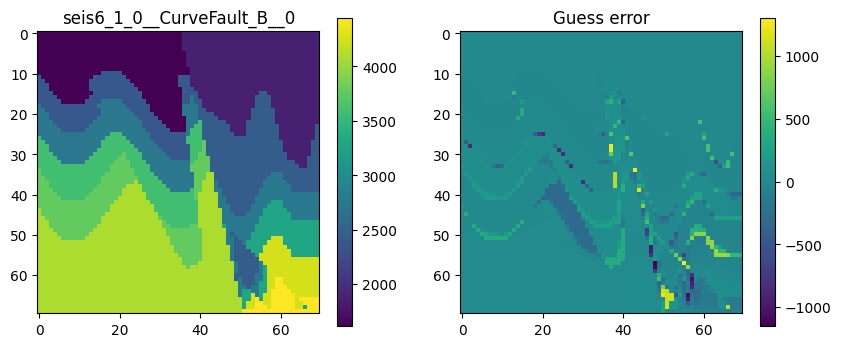

diag 3.250623900849397e-05
diag 3.250623900849397e-05


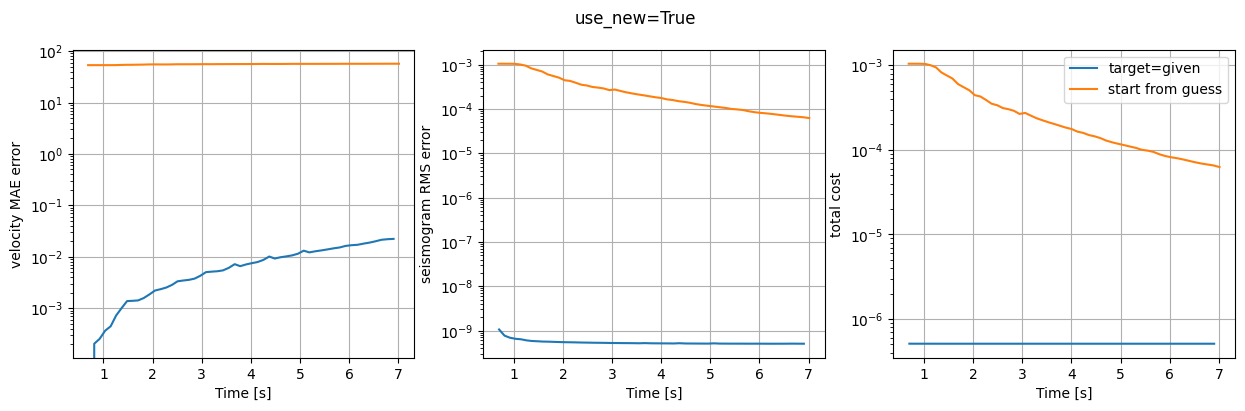

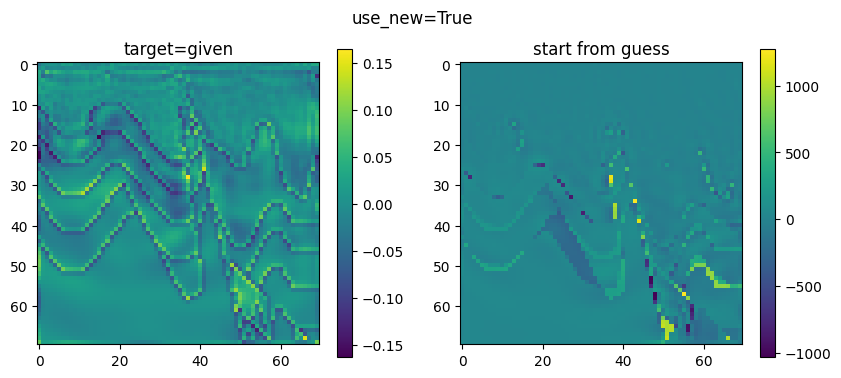

diag 3.250623900849397e-05
diag 3.250623900849397e-05


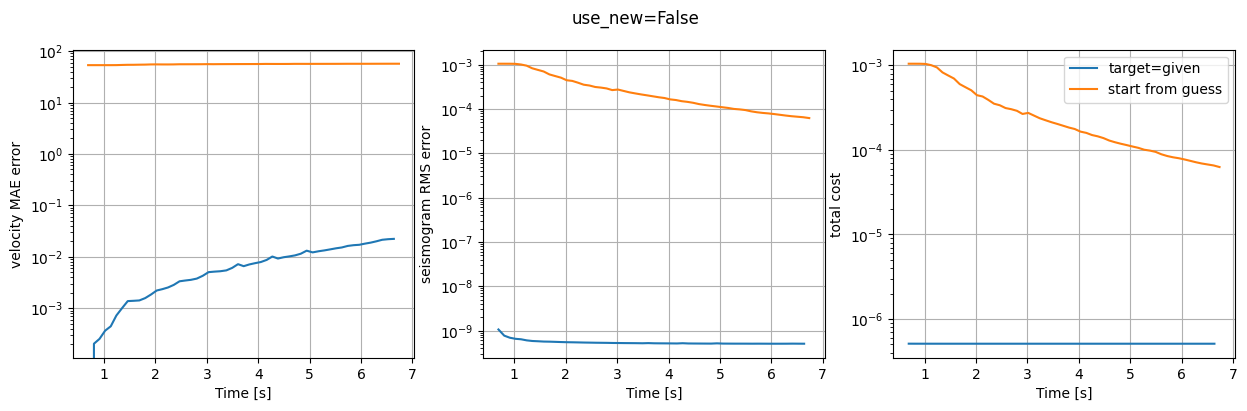

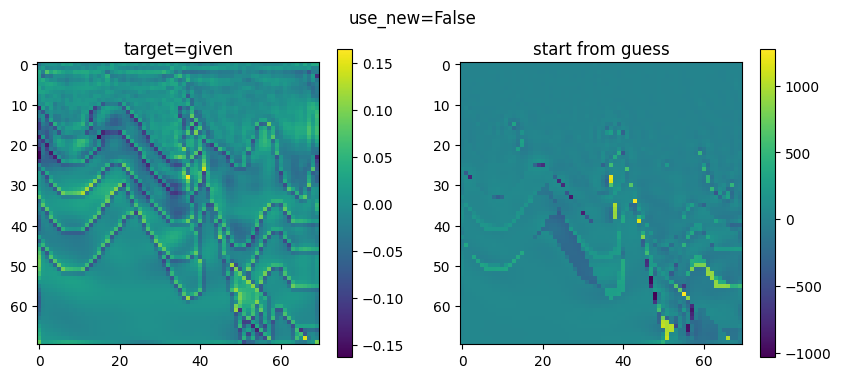

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.05it/s]


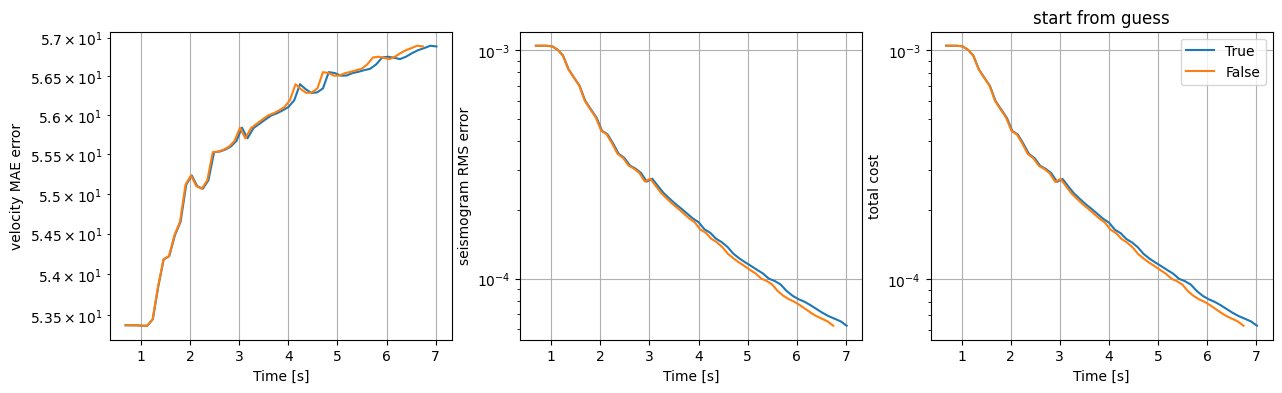

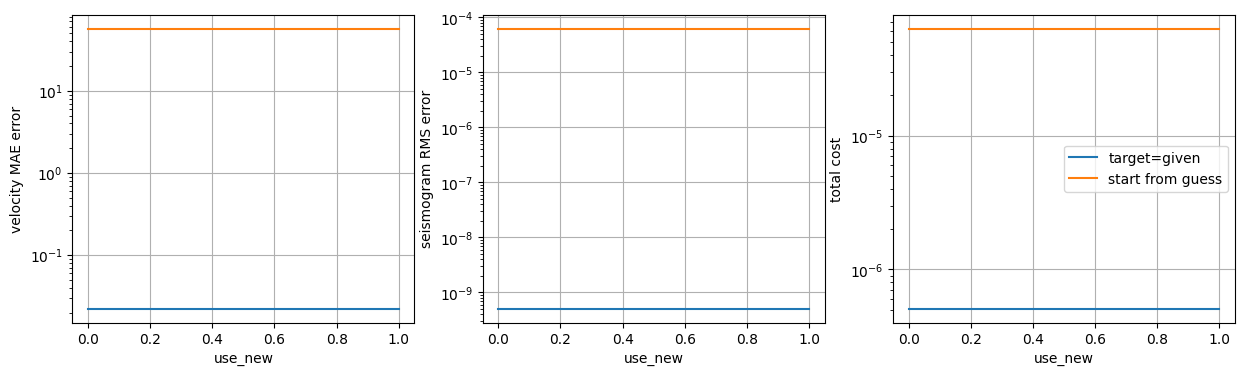

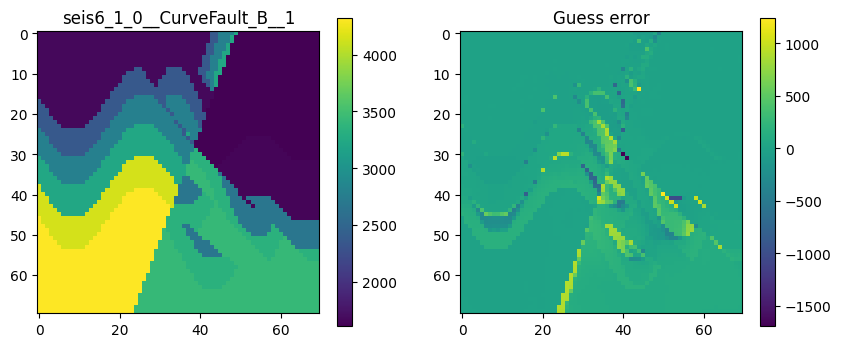

diag 4.576705036178085e-05
diag 4.576705036178085e-05


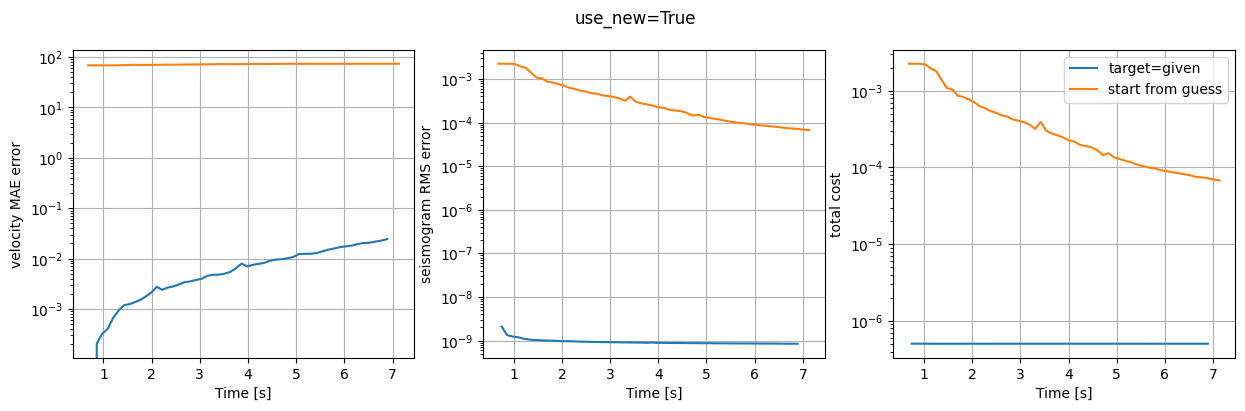

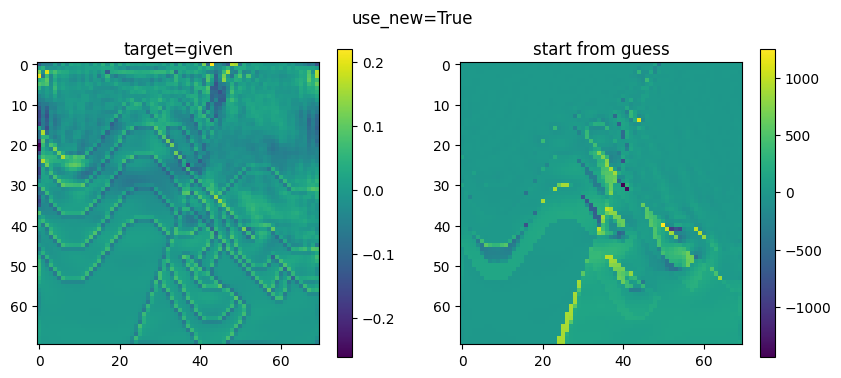

diag 4.576705036178085e-05
diag 4.576705036178085e-05


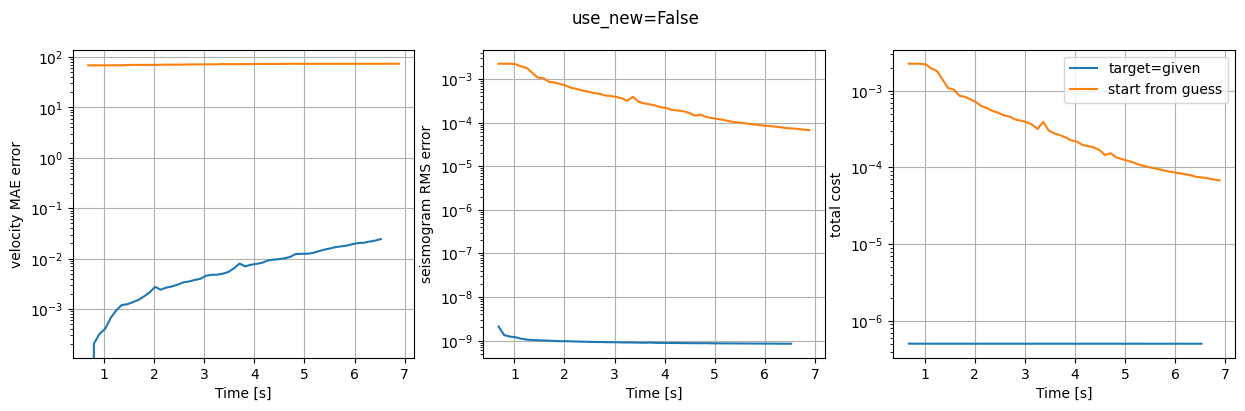

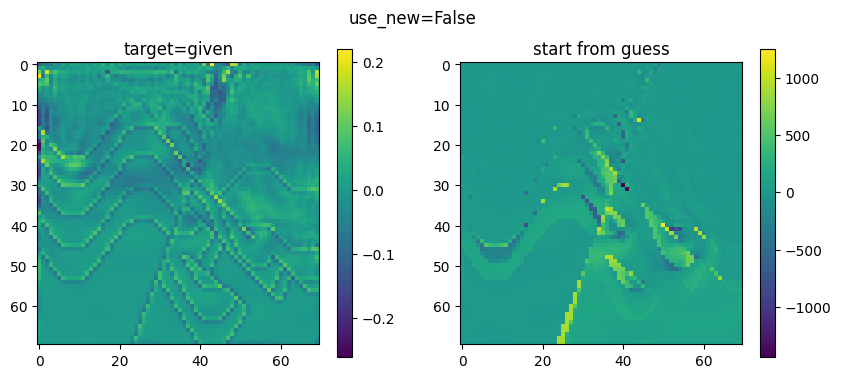

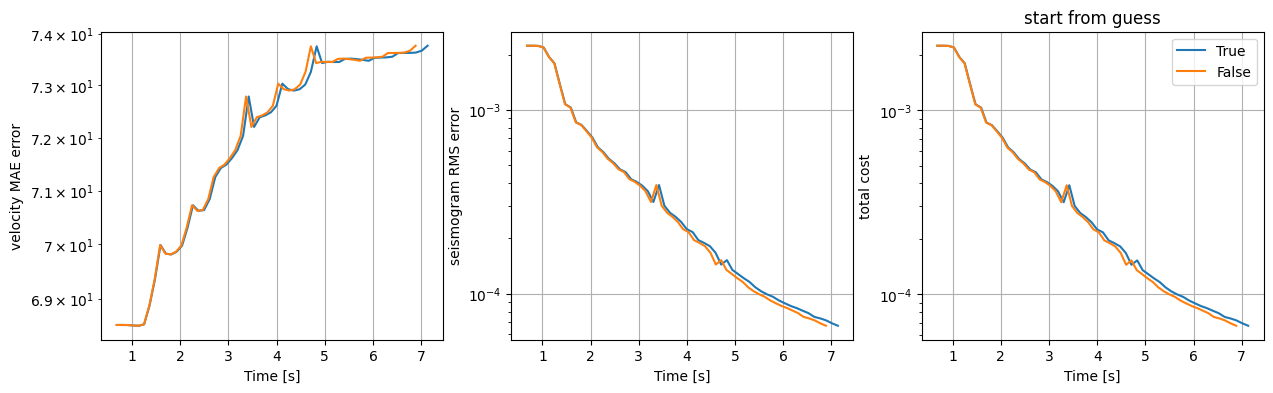

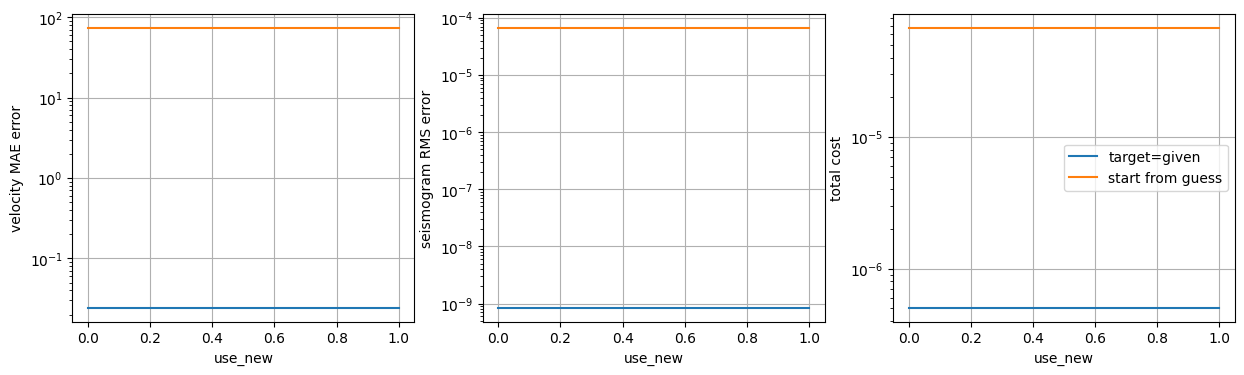

In [36]:
importlib.reload(seis_prior)
importlib.reload(seis_diagnostics)
importlib.reload(seis_invert)
importlib.reload(seis_forward)
importlib.reload(seis_model)
importlib.reload(seis_numerics)
kgs.profiling=False
seis_invert.profiling=False
kgs.debugging_mode = 0
seis_forward2.profiling=False
seis_forward2.reset_profile()

# transform back on, history size to infinite, maxiter down
model = seis_model.model_TV2D()
model.show_convergence = True
model.iter_list = [50]

do_which_list = [False,True,True]

def param_func(model,value):    
    model.use_new_bfgs=value
    return model
    
param_values = [True,False]
param_name = "use_new"


for d in data[500:502]:
    results = seis_diagnostics.do_diagnostics_run(d, model, do_which_list, param_func, param_values, param_name, help_fac=0.)

In [9]:
%debug

> f:\seismic\code\core\seis_prior.py(39)compute_cost_and_gradient()
     37 
     38     def compute_cost_and_gradient(self, x, compute_gradient = False):
---> 39         assert x.shape == (self.N,1)
     40 
     41         cost, gradient = self._compute_cost_and_gradient(x, compute_gradient)



ipdb>  x.shape


(4901, 1, 1)


ipdb>  q
